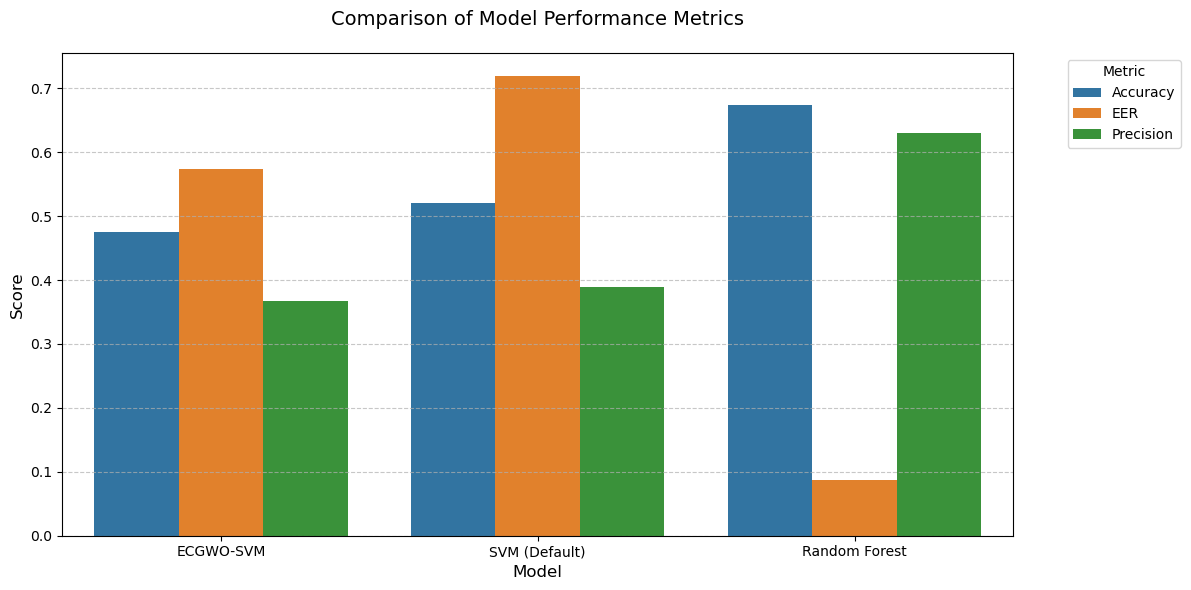

In [6]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the results
with open('../reports/evaluation_results_2025-08-28_20-22-05.json') as f:
    results = json.load(f)

# Create a DataFrame for easy plotting
data = {
    'Model': ['ECGWO-SVM', 'SVM (Default)', 'Random Forest'],
    'Accuracy': [
        results['ecgwo_svm']['accuracy'],
        results['svm_default']['accuracy'],
        results['random_forest']['accuracy']
    ],
    'EER': [
        results['ecgwo_svm']['eer'],
        results['svm_default']['eer'],
        results['random_forest']['eer']
    ],
    'Precision': [
        results['ecgwo_svm']['precision'],
        results['svm_default']['precision'],
        results['random_forest']['precision']
    ]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set style and create figure
# plt.style.use('seaborn-darkgrid')  # or any other valid style like 'default', 'classic', etc.
plt.figure(figsize=(12, 6))

# Create the grouped bar plot
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted)

# Customize the plot
plt.title('Comparison of Model Performance Metrics', pad=20, size=14)
plt.xlabel('Model', size=12)
plt.ylabel('Score', size=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and save
plt.tight_layout()
plt.savefig('../reports/figures/model_comparison.png', bbox_inches='tight', dpi=300)
plt.show()